$$\require{mhchem}$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 동적 평형(dynamic equilibrium)

동적 평형은 가역반응에서 정반응과 역반응의 반응 속도가 같아져 계속 반응하고 있으나 반응이 정지한 것처럼 보이는 상태이다.

이 동적평형의 대표적 예는 다음이 있다.

* 상평형(phase equilibrium)
    + $\ce{H2O(l)<=>H2O(g)}$
* 용해평형(solubility equilibrium)
    + $\ce{NaCl(s)<=>Na+(aq) + Cl^{-}(aq)}$
* 화학평형(chemical equilibrium)
    + $\ce{2NO2(g)<=>N2O4(g)}$
* ...

# 상평형

## 구성 조건

* $\ce{X(l)<=>X(g)}$는 가역반응이다.

* $x,\,y$는 각각 $\ce{X(l)},\,\ce{X(g)}$의 양을 의미한다.

* $\ce{X(l)->X(g)}$(증발, evaporation)의 속도, $v_e$는 온도와 여러 변수가 혼재된 변수 $T$에 따라 변하며 $T$가 일정하면 정반응 속도도 항상 일정하다. 구체적으로 $v_e=T$

* $\ce{X(l)<-X(g)}$(응축, condensation)의 속도, $v_c$는 일정하지 않고 변하며, 정반응 속도에 시간이 지날수록 수렴한다.
구체적으로 역반응 속도, $v_c$는 임의의 상수 $k$에 대하여 $v_c=ky$를 만족한다.

* $x$, $y$는 다음 식을 만족한다. $$\begin{cases}\displaystyle\frac{dx}{dt}&=v_c-v_e&=ky-T\\\displaystyle\frac{dy}{dt}&=v_e-v_c&=T-ky\end{cases}$$

In [ ]:
def de_phase_solver(t, dt, x, y, v_c, v_e, T, k):
    v_e[0], v_c[0] = T, k*y[0]
    for i in range(len(t)-1):
        

In [48]:
t, dt = np.linspace(0, 100, 100000, retstep= True)
x = np.zeros_like(t) # liquid
y = np.zeros_like(t) # gas
v_c = np.zeros_like(t) # condensation speed
v_e = np.zeros_like(t) # evaporation speed

T = 1 # evaporation constant 
k = 0.05 # condensation constant

# initial value
x[0] = 100
y[0] = 0
v_c[0] = 0
v_e[0] = T

for i in range(len(t)-1):
    x[i+1] = x[i] + dt * (v_c[i] - v_e[i])
    y[i+1] = y[i] + dt * (v_e[i] - v_c[i])
    v_e[i+1] = T
    v_c[i+1] = k * y[i+1]


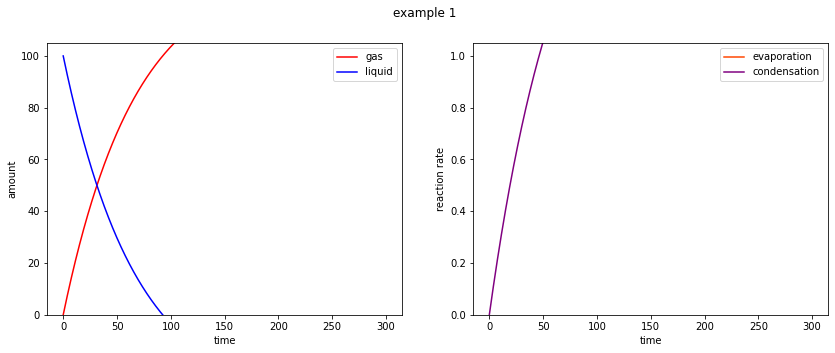

In [56]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))

fig.suptitle("Example 1")

ax[0].plot(t, y, label=r"gas", color='red')
ax[0].plot(t, x, label=r"liquid", color='blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("amount")
ax[0].set_ylim((0, 100+5))

ax[1].plot(t, v_e, label='evaporation', color='orangered')
ax[1].plot(t, v_c, label='condensation', color='purple')
ax[1].set_xlabel("time")
ax[1].set_ylabel("reaction rate")
ax[1].set_ylim((0, 1+0.05))

ax[1].legend()
ax[0].legend()

plt.show()

In [77]:
t, dt = np.linspace(0, 200, 200000, retstep= True)
x = np.zeros_like(t)
y = np.zeros_like(t)
v_c = np.zeros_like(t)
v_e = np.zeros_like(t)

T = 1.5
k = 0.025

x[0] = 100
y[0] = 0
v_c[0] = 0
v_e[0] = T

for i in range(len(t)-1):
    x[i+1] = x[i] + dt * (v_c[i] - v_e[i])
    y[i+1] = y[i] + dt * (v_e[i] - v_c[i])
    v_e[i+1] = T
    v_c[i+1] = k * y[i+1]


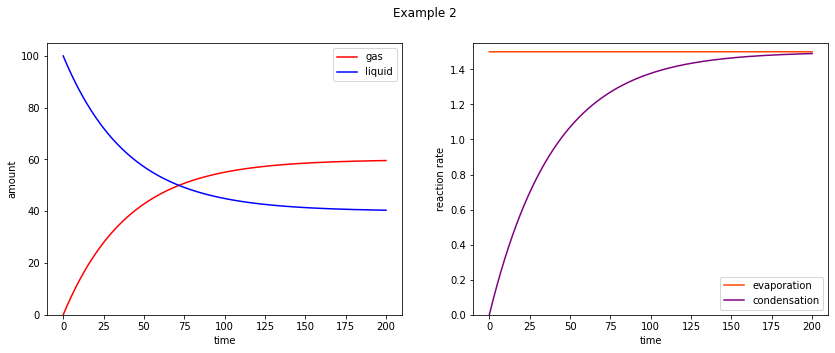

In [78]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))

fig.suptitle("Example 2")

ax[0].plot(t, y, label=r"gas", color='red')
ax[0].plot(t, x, label=r"liquid", color='blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("amount")
ax[0].set_ylim((0, 100+5))

ax[1].plot(t, v_e, label='evaporation', color='orangered')
ax[1].plot(t, v_c, label='condensation', color='purple')
ax[1].set_xlabel("time")
ax[1].set_ylabel("reaction rate")
ax[1].set_ylim((0, 1.5+0.05))

ax[1].legend()
ax[0].legend()

plt.show()

In [57]:
t, dt = np.linspace(0, 300, 300000, retstep= True)
x = np.zeros_like(t)
y = np.zeros_like(t)
v_c = np.zeros_like(t)
v_e = np.zeros_like(t)

T = 2
k = 0.015

x[0] = 100
y[0] = 0
v_c[0] = 0
v_e[0] = T

for i in range(len(t)-1):
    x[i+1] = x[i] + dt * (v_c[i] - v_e[i])
    y[i+1] = y[i] + dt * (v_e[i] - v_c[i])
    v_e[i+1] = T
    v_c[i+1] = k * y[i+1]


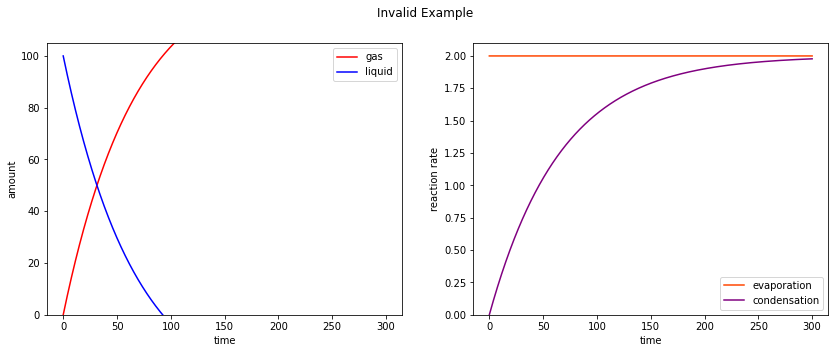

In [60]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))

fig.suptitle("Invalid Example")

ax[0].plot(t, y, label=r"gas", color='red')
ax[0].plot(t, x, label=r"liquid", color='blue')
ax[0].set_xlabel("time")
ax[0].set_ylabel("amount")
ax[0].set_ylim((0, 100+5))

ax[1].plot(t, v_e, label='evaporation', color='orangered')
ax[1].plot(t, v_c, label='condensation', color='purple')
ax[1].set_xlabel("time")
ax[1].set_ylabel("reaction rate")
ax[1].set_ylim((0, 2+0.1))

ax[1].legend()
ax[0].legend()

plt.show()

# 용해평형

## 구성 조건

* $\ce{X(s)<=>X(aq)}$는 가역반응이다.

* $x$, $y$는 각각 $\ce{X(s)}$와 $\ce{X(aq)}$의 양을 의미한다.

* $\ce{X(s)->X(aq)}$(용해, dissolution)의 속도, $v_s$는 일정하다. 구체적으로 $v_s=k_s$

* $\ce{X(s)<-X(aq)}$(석출, eduction)의 속도, $v_e$는 변하며 용해 속도에 시간이 지날수록 수렴한다.
구체적으로 임의의 상수 $k_e$에 대하여 $v_e=k_e y$

* $x$, $y$는 다음 식을 만족한다. $$\begin{cases}\displaystyle\frac{dx}{dt}&=v_e-v_s&=k_e y-k_s\\\displaystyle\frac{dy}{dt}&=v_s-v_e&=k_s-k_ey\end{cases}$$

# 화학 평형